**(a)**

Any vector from plane to point is $v=\begin{bmatrix} x_1+1 \\ x_2 \\ x_3-1 \end{bmatrix}$

The length of vector =$|v|=\sqrt{(x_1+1)^2+x_2^2+(x_3-1)^2}$

Define the optimization problem:

$\underset{x_1,x_2,x_3}{\text{min}}(x_1+1)^2+x_2^2+(x_3-1)^2$ <br />
s.t. $\ x_1+2x_2+3x_3=1$

$\therefore \ x_1=1-2x_2-3x_3$

$\underset{x_2,x_3}{\text{min}} \ (2-2x_2-3x_3)^2+x_2^2+(x_3-1)^2$

In [3]:
from sympy import *
x2, x3 = symbols('x2 x3')
factor((2-2*x2-3*x3)**2+x2**2+(x3-1)**2)

5*x2**2 + 12*x2*x3 - 8*x2 + 10*x3**2 - 14*x3 + 5

Find the stationary point G=0:

$G=\begin{bmatrix}
\frac{\partial f}{\partial x_2}  \\
\frac{\partial f}{\partial x_3}
\end{bmatrix}
=\begin{bmatrix}
10x_2+12x_3-8  \\
12x_2+20x_3-14
\end{bmatrix}=0$

$\therefore$

$\begin{aligned}
10x_2+12x_3-8&=0 \\
12x_2+18x_3-11&=0 \\
x_2 &= -\frac{1}{7} \\
x_3 &=  \frac{11}{14} \\
x_1 &= 1- 2*(-\frac{1}{7}) - 2*\frac{11}{14} \\
 &= -\frac{15}{14}
\end{aligned}$

$\therefore $ Stationary point:

$x=\begin{bmatrix} -\frac{15}{14} \\ -\frac{1}{7} \\ \frac{11}{14} \end{bmatrix}$

Find the Hessian matrix at the stationary point:

$
H=\begin{bmatrix}
\frac{\partial^2 f}{\partial x_2^2} & \frac{\partial^2 f}{\partial x_2 \partial x_3} \\
\frac{\partial^2 f}{\partial x_3 \partial x_2} & \frac{\partial^2 f}{\partial x_3^2}
\end{bmatrix}
=\begin{bmatrix}
10 & 12 \\
12& 20
\end{bmatrix}
$

$|I\lambda-H|=0$

$\begin{vmatrix}
\lambda-10 & 12 \\
 12& \lambda-20
\end{vmatrix} = (\lambda-10)(\lambda-20)-144=0$

In [4]:

from sympy import *
lam = symbols('lam')
factor((lam-10)*(lam-20)-144)

(lam - 28)*(lam - 2)

The H matrix has two positive eigenvalues, it is a positive definite matrix, the problem is convex, and $x$ is the minimum point.

**(b) 1.Gradient Descent**

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[[0.0, 0.0], array([0.0625  , 0.109375]), array([0.10986328, 0.19580078]), array([0.14542389, 0.26428223]), array([0.17178619, 0.31872964]), array([0.19098449, 0.36219818]), array([0.20460775, 0.39707492]), array([0.21389699, 0.42522498]), array([0.2257459 , 0.47098649]), array([0.22716314, 0.50022586]), array([0.22287655, 0.52006219]), array([0.20820431, 0.54894461]), array([0.124532  , 0.61427662]), array([0.08599204, 0.62803184]), array([0.03645422, 0.67896418]), array([0.02045071, 0.67844123]), array([-0.02277453,  0.70166208]), array([-0.03478701,  0.71666537]), array([-0.05054416,  0.72192391]), array([-0.06039699,  0.73242714]), array([-0.08354146,  0.74195478]), array([-0.0856678 ,  0.74706109]), array([-0.09917469,  0.75791006]), array([-0.10562305,  0.7599035 ]), array([-0.10953627,  0.76

Text(0.5, 1.0, 'Log-Linear Convergence Plot: Gradient Descent')

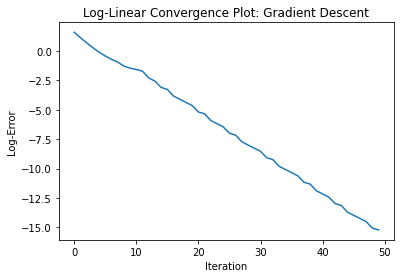

In [201]:
import numpy as np
obj = lambda x: 5*x[0]**2+12*x[0]*x[1]-8*x[0]+10*x[1]**2-14*x[1]+5  # note that this is 1D. In Prob 2 it should be 2D.
def grad(x):
    return np.array([10*x[0]+12*x[1]-8,12*x[0]+20*x[1]-14])
eps = 1e-3  # termination criterion
x0 = [0.,0.]  # initial guess
k = 0  # counter
soln = [x0]
fun = [obj(x0)]# use an array to store the search steps
iteration = [k]
x = soln[k]
error = np.linalg.norm(grad(x))  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value

def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) + a*0.8*np.dot(grad(x),-grad(x))
    while phi(a,x)<obj(x-a*grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5*a
    return a

while error >= eps and k < 100:  # keep searching while gradient norm is larger than eps
    a = line_search(x)
    x = x - a*grad(x)
    soln.append(x)
    fun.append(obj(x))
    error = np.linalg.norm(grad(x))
    k += 1
    iteration.append(k)

print(iteration)
print(soln)
print(fun)
x2=soln[-1][0]
x3=soln[-1][1]
x1=1-2*x2-3*x3
print('(x1,x2,x3) = (',x1,x2,x3,')')

import matplotlib.pyplot as plt
plt.plot(iteration,np.log(fun-obj(np.array([-1/7,11/14]))))
plt.xlabel('Iteration')
plt.ylabel('Log-Error')
plt.title('Log-Linear Convergence Plot: Gradient Descent')

**2.Newton's Algorithm**

(x1,x2,x3) = ( -0.9933632757450332 -0.13747332936172638 0.7561033114894954 )


Text(0.5, 1.0, "Log-Linear Convergence Plot: Newton's Algorithm")

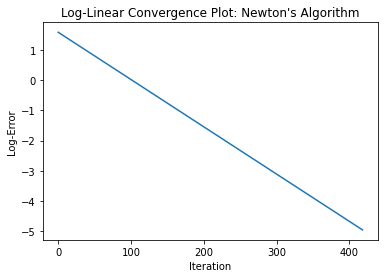

In [205]:
import numpy as np
obj = lambda x: 5*x.item(0)**2+12*x.item(0)*x.item(1)-8*x.item(0)+10*x.item(1)**2-14*x.item(1)+5  # note that this is 1D. In Prob 2 it should be 2D.
def grad(x):
    return np.matrix([10*x.item(0)+12*x.item(1)-8,12*x.item(0)+20*x.item(1)-14])
def hess():
    return np.matrix([
                     [10,12],
                     [12,20]
                     ])
eps = 1e-4  # termination criterion
x0 = np.matrix([0.,0.])  # initial guess
k = 0  # counter
soln = [x0]
fun = [obj(x0)]# use an array to store the search steps
iteration = [k]
x = soln[k]  # start with the initial guess
error = grad(x)*np.linalg.inv(hess())*np.transpose(grad(x))

def line_search(x):
    a = 1.
    phi = lambda a, x: obj(x) + a*0.8*grad(x)*-np.transpose(grad(x))
    while phi(a,x)<obj(x-a*grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5*a
    return a

while error**2/2 >= eps and k < 1000:
    a = line_search(x)
    x = x - a*grad(x)*np.linalg.inv(hess())
    soln.append(x)
    fun.append(obj(x))
    error = grad(x)*np.linalg.inv(hess())*np.transpose(grad(x))
    k += 1
    iteration.append(k)

# print(soln)
# print(fun)
x2=soln[-1].item(0)
x3=soln[-1].item(1)
x1=1-2*x2-3*x3
print('(x1,x2,x3) = (',x1,x2,x3,')')

import matplotlib.pyplot as plt
plt.plot(iteration,np.log([s-obj(np.matrix([-1/7,11/14])) for s in fun]))
plt.xlabel('Iteration')
plt.ylabel('Log-Error')
plt.title("Log-Linear Convergence Plot: Newton's Algorithm")